<a href="https://colab.research.google.com/github/hrsh668/ml/blob/main/Copy_of_%5BAudiobooks_Complete%5D_TensorFlow_Audiobooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Audiobooks business case

### Extract the data from the csv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Axes: >

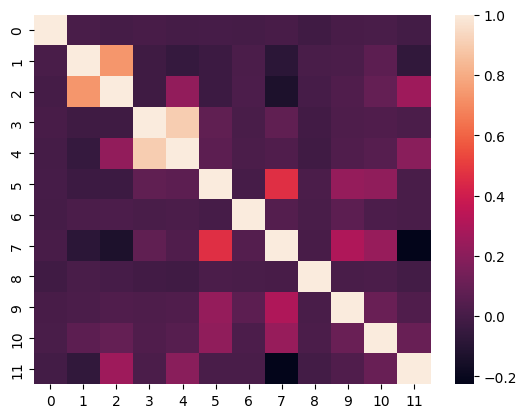

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
from sklearn import preprocessing
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
# libraries imported

raw_csv_data = np.loadtxt('/content/drive/MyDrive/DataSets/Business_case_dataset.csv',delimiter=',')
unscaled_inputs_all = raw_csv_data[:,1:-1]
targets_all = raw_csv_data[:,-1]
df = pd.read_csv('/content/drive/MyDrive/DataSets/Business_case_dataset.csv', header=None)
sns.heatmap(df.corr())
# csv file uploaded and correlation map created

### Balance the dataset

In [ ]:
num_one_targets = int(np.sum(targets_all))

zero_targets_counter = 0

indices_to_remove = []

for i in range(targets_all.shape[0]):
    if targets_all[i] == 0:
        zero_targets_counter += 1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)
# two variables created; one stores the inputs and targets

unscaled_inputs_equal_priors = np.delete(unscaled_inputs_all, indices_to_remove, axis=0)
targets_equal_priors = np.delete(targets_all, indices_to_remove, axis=0)
# additional 0's are removed from targets

### Standardize the inputs

In [ ]:
scaled_inputs = preprocessing.scale(unscaled_inputs_equal_priors)
# input values are scaled

### Shuffle the data

In [ ]:
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)
# indices are shuffled


shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets_equal_priors[shuffled_indices]
# the shuffled indices are used to shuffle the inputs and targets.

### Split the dataset into train, validation, and test

In [ ]:
samples_count = shuffled_inputs.shape[0]

train_samples_count = int(0.7 * samples_count)
validation_samples_count = int(0.2 * samples_count)
test_samples_count = samples_count - train_samples_count - validation_samples_count
# of training, validating, and testing instances defined


train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]
validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]
test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]
# variables for storing train_inputs, train_targets, validation_targets, etc defined


## Model Outline

In [ ]:
# Set the input and output sizes
input_size = 10
output_size = 2

hidden_layer_size = 50

# define how the model will look like
model = tf.keras.Sequential([
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
       # 1st hidden layer with input size 10 # 1st hidden layer
      tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),

    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, activation='softmax') # output lay
])

### Choose the optimizer and the loss function

# we define the optimizer we'd like to use,
# the loss function,
# and the metrics we are interested in obtaining at each iteration

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training
# That's where we train the model we have built.

# set the batch size
batch_size = 100

# set a maximum number of training epochs
max_epochs = 100

# set an early stopping mechanism
# let's set patience=2, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

# fit the model
# note that this time the train, validation and test data are not iterable
model.fit(train_inputs, # train inputs
          train_targets, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't kick in)
          callbacks=[early_stopping], # early stopping
          validation_data=(validation_inputs, validation_targets), # validation data
          verbose = 2 # making sure we get enough information about the training process
          )

Epoch 1/100
32/32 - 1s - loss: 0.5947 - accuracy: 0.7084 - val_loss: 0.4583 - val_accuracy: 0.8837 - 941ms/epoch - 29ms/step
Epoch 2/100
32/32 - 0s - loss: 0.3904 - accuracy: 0.8767 - val_loss: 0.3217 - val_accuracy: 0.8848 - 122ms/epoch - 4ms/step
Epoch 3/100
32/32 - 0s - loss: 0.3172 - accuracy: 0.8850 - val_loss: 0.2910 - val_accuracy: 0.8904 - 110ms/epoch - 3ms/step
Epoch 4/100
32/32 - 0s - loss: 0.2971 - accuracy: 0.8908 - val_loss: 0.2797 - val_accuracy: 0.8915 - 113ms/epoch - 4ms/step
Epoch 5/100
32/32 - 0s - loss: 0.2839 - accuracy: 0.8959 - val_loss: 0.2717 - val_accuracy: 0.8949 - 123ms/epoch - 4ms/step
Epoch 6/100
32/32 - 0s - loss: 0.2727 - accuracy: 0.9000 - val_loss: 0.2637 - val_accuracy: 0.8949 - 102ms/epoch - 3ms/step
Epoch 7/100
32/32 - 0s - loss: 0.2662 - accuracy: 0.8988 - val_loss: 0.2585 - val_accuracy: 0.8971 - 96ms/epoch - 3ms/step
Epoch 8/100
32/32 - 0s - loss: 0.2605 - accuracy: 0.9019 - val_loss: 0.2601 - val_accuracy: 0.8960 - 102ms/epoch - 3ms/step
Epoch 9/

## Test the model

In [ ]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

15/15 [==============================] - 0s 3ms/step - loss: 0.2437 - accuracy: 0.9065

Test loss: 0.24. Test accuracy: 90.65%
